# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [5]:
from helper import *

In [6]:
df = pd.read_csv('DK_2_filled.csv')
cols = ['Timestamp', 'Date']
for col in cols:
    df[col] = pd.to_datetime(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         43776 non-null  datetime64[ns]
 1   Date              43776 non-null  datetime64[ns]
 2   TTF               43776 non-null  float64       
 3   CO2               43776 non-null  float64       
 4   Day-ahead prices  43776 non-null  float64       
 5   Forecasted Load   43776 non-null  float64       
 6   Actual Load       43776 non-null  float64       
 7   Solar             43776 non-null  float64       
 8   Wind Offshore     43776 non-null  float64       
 9   Wind Onshore      43776 non-null  float64       
 10  Wind Total        43776 non-null  float64       
 11  Year              43776 non-null  int64         
 12  Quarter           43776 non-null  int64         
 13  Month             43776 non-null  int64         
 14  Day               4377

# Splitting

## Option 1 - sklearn function

In [8]:
tscv = TimeSeriesSplit(gap = 24*30*0, n_splits = 3, test_size = 24*30*3, max_train_size = df.shape[0])
# gap: observations between train and test set -> 0 months
# n_splits: # of folds
# test_size: observations for test set -> 3 months
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=43776, n_splits=3, test_size=2160)


Fold 0:
  Train: index = [    0     1     2 ... 37293 37294 37295]
  Test:  index = [37296 37297 37298 ... 39453 39454 39455]


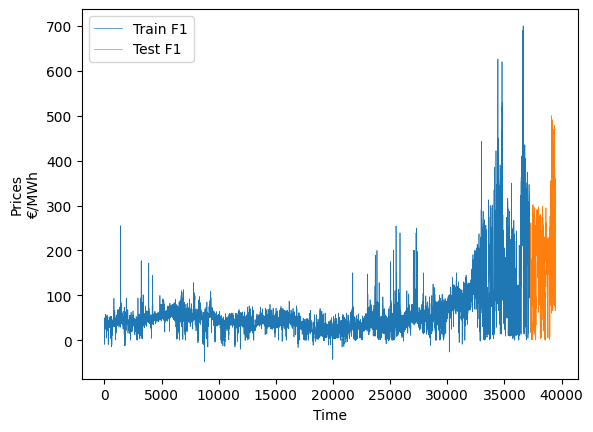

Fold 1:
  Train: index = [    0     1     2 ... 39453 39454 39455]
  Test:  index = [39456 39457 39458 ... 41613 41614 41615]


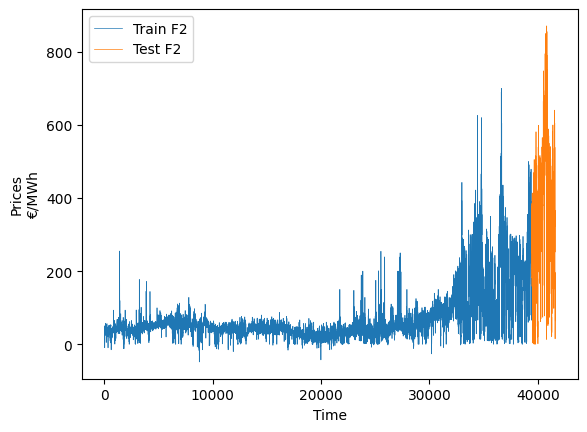

Fold 2:
  Train: index = [    0     1     2 ... 41613 41614 41615]
  Test:  index = [41616 41617 41618 ... 43773 43774 43775]


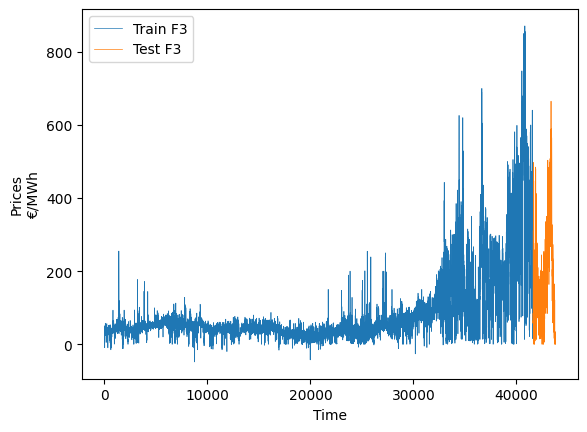

In [9]:
for i, (train_index, test_index) in enumerate(tscv.split(df['Timestamp'])):
    print(f"Fold {i}:")
    print(f"  Train: index = {train_index}")
    print(f"  Test:  index = {test_index}")
    
    X_train = df.iloc[train_index].copy()
    X_test = df.iloc[test_index].copy()
    
    plt.plot(X_train['Day-ahead prices'], label = 'Train F'+str(i+1), linewidth = 0.5)
    plt.plot(X_test['Day-ahead prices'], label = 'Test F'+str(i+1), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()


## Option 2 - manually

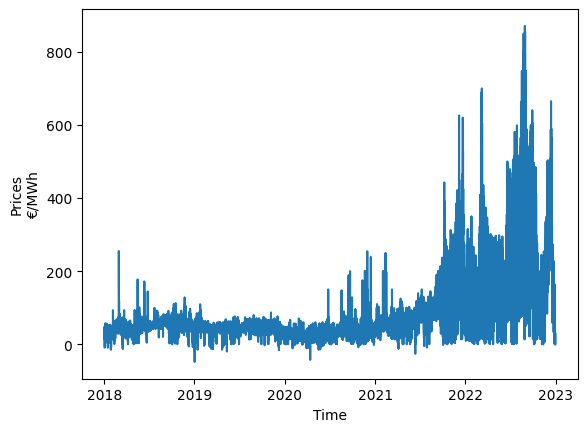

In [10]:
plt.plot(df['Timestamp'], df['Day-ahead prices'])
plt.xlabel('Time')
plt.ylabel('Prices\n€/MWh')
plt.show()

Fold 1: train 01/01/2018 - 31/12/2020, test 01/01/2021 - 31/03/2021<br>
Fold 2: train 01/01/2018 - 30/06/2021, test 01/07/2021 - 30/09/2021<br>
Fold 3: train 01/01/2017 - 31/08/2022, test 01/09/2022 - 31/12/2022

In [11]:
train_start = ['2018-01-01', '2018-01-01', '2018-01-01']
train_end = ['2020-12-31', '2021-06-20', '2022-08-31']

test_start = ['2021-01-01', '2021-07-01', '2022-09-01']
test_end = ['2021-03-31', '2021-09-30', '2022-12-31']

In [12]:
df2 = df.set_index('Timestamp')

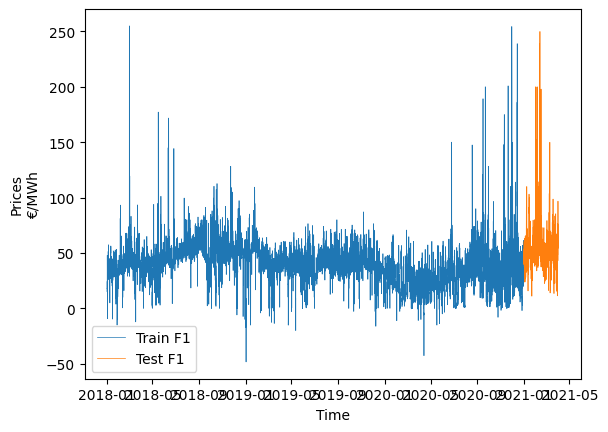

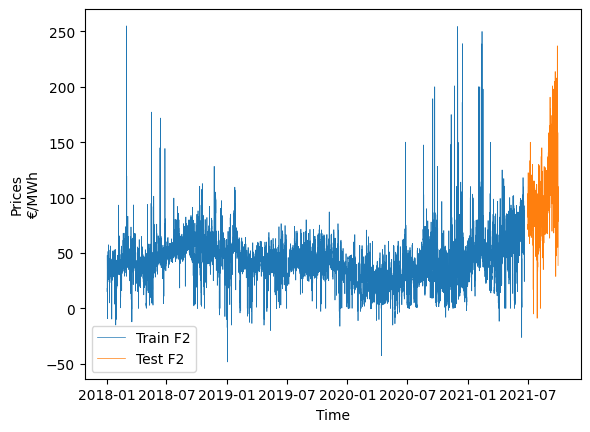

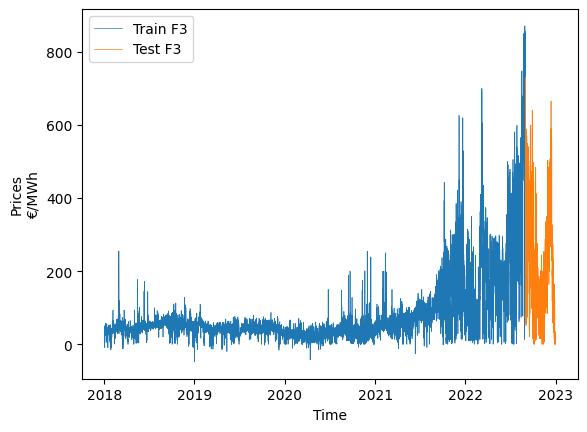

In [13]:
i = 1
for tr_s, tr_e, te_s, te_e in (zip(train_start, train_end, test_start, test_end)):
    
    X_train, X_test = split_timeseries(df2, tr_s, tr_e, te_s, te_e)
    
    plt.plot(X_train['Day-ahead prices'], label = 'Train F'+str(i), linewidth = 0.5)
    plt.plot(X_test['Day-ahead prices'], label = 'Test F'+str(i), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()
    
    i += 1

# Standardization

In [11]:
def standardize(train_set, test_set, cols):
    mu = train_set[cols].mean()
    std = train_set[cols].std()
    
    train_set_std = (train_set - mu) / std
    test_set_std = (test_set - mu) / std
    
    return train_set_std, test_set_std

In [33]:
k = 0
train1, test1 = split_timeseries(df2, train_start[k], train_end[k], test_start[k], test_end[k])

In [34]:
train1.shape

(26280, 17)

In [35]:
test1.shape

(2160, 17)